# Predicting the success of bank telemarketing 

# Data Pre-processing 

## Data integration and Cleaning

In [1]:
# Import libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import sklearn
import scikitplot as skplt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# changing the working directory 
os.chdir("/Users/User/OneDrive/Documents/MSc Data Science/Machine learning/Assignment")
print(os.getcwd())

C:\Users\User\OneDrive\Documents\MSc Data Science\Machine learning\Assignment


In [3]:
# loading the data frame by accessing the dataset file
dataframe = pd.read_csv("bank-full.csv", sep = ";")

dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# checking how many rows and columns are there in the dataset 
print('Shape of the data is: ',dataframe.shape)

Shape of the data is:  (45211, 17)


In [5]:
# dataset has been copied as df
df = dataframe.copy() 

In [6]:
# checking the first few rows of the dataset
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [7]:
# checking the datatypes of all columns
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [8]:
# checking for null values in all columns 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# finding the unique values and how many unique values are there for each column of the dataframe

for col in df:
  print(col, df[col].nunique(),"unique values")
  print(df[col].unique())

age 77 unique values
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job 12 unique values
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital 3 unique values
['married' 'single' 'divorced']
education 4 unique values
['tertiary' 'secondary' 'unknown' 'primary']
default 2 unique values
['no' 'yes']
balance 7168 unique values
[ 2143    29     2 ...  8205 14204 16353]
housing 2 unique values
['yes' 'no']
loan 2 unique values
['no' 'yes']
contact 3 unique values
['unknown' 'cellular' 'telephone']
day 31 unique values
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month 12 unique values
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 's

In [10]:
#checking for duplicated rows and removing those

print(df.duplicated().value_counts())
df.drop_duplicates (inplace = True)
df.shape

False    45211
dtype: int64


(45211, 17)

In [11]:
# removing rows with telephone call less than 5 seconds

condition2 = (df['duration']<5)
df1 = df.drop(df[condition2].index, axis = 0, inplace = False)
df1.shape

(45184, 17)

In [12]:
#rename the output column as "outcome"

df1.rename(columns = {'y':'campaign_outcome', 'default':'credit_default', 'balance':'acc_balance', 'housing':'housing_loan','loan':'personal_loan','contact':'contact_method'}, inplace = True)

df1.columns

Index(['age', 'job', 'marital', 'education', 'credit_default', 'acc_balance',
       'housing_loan', 'personal_loan', 'contact_method', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'campaign_outcome'],
      dtype='object')

## Exploratory Data Analysis

### For numerical data

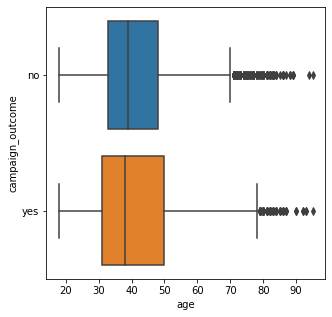

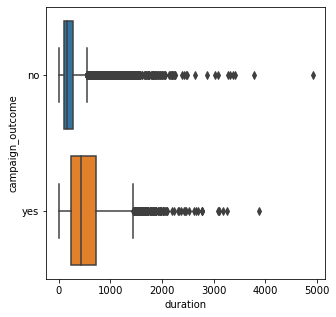

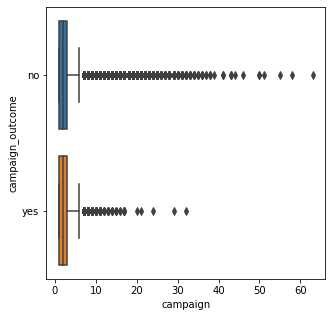

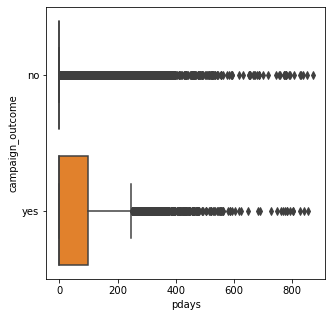

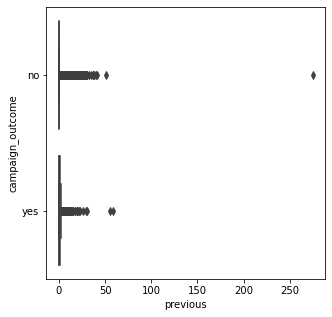

In [13]:
# checking skewness of numerical variables with box plots 
num_var = ["age", "duration","campaign", "pdays", "previous"]

for i in num_var:
  plt.figure(figsize = (5,5))
  sns.boxplot(x = i,y = df1['campaign_outcome'] ,data = df)
  plt.show();

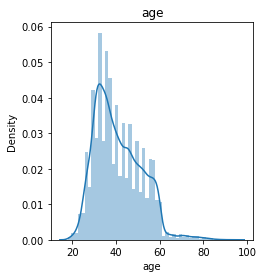

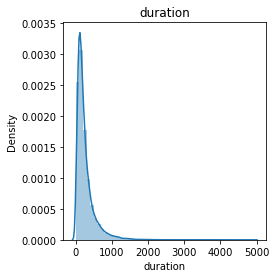

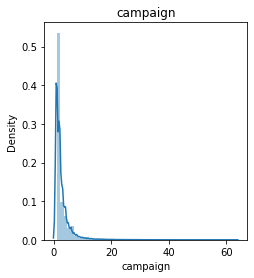

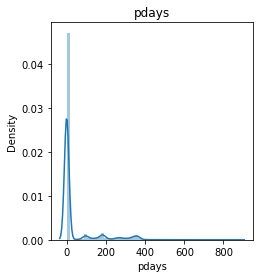

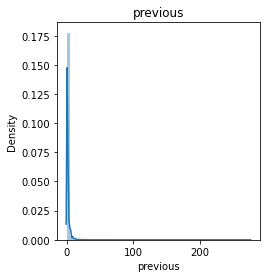

In [14]:
for column in num_var:
    plt.figure(figsize=(8,4))
    plt.subplot(121)
    sns.distplot(df1[column])
    plt.title(column)

Age and call duration was positively skewed, possibly indicating a presence of outliers. This was discovered through the box plots and distribution plots above.

Similarly, the number of calls made during the campaign and number of calls made to same customer for previous campaigns were also positively skewed. Some of these skewed features were transformed using logarithmic transformation to reduce their skewness values and correct their distribution.

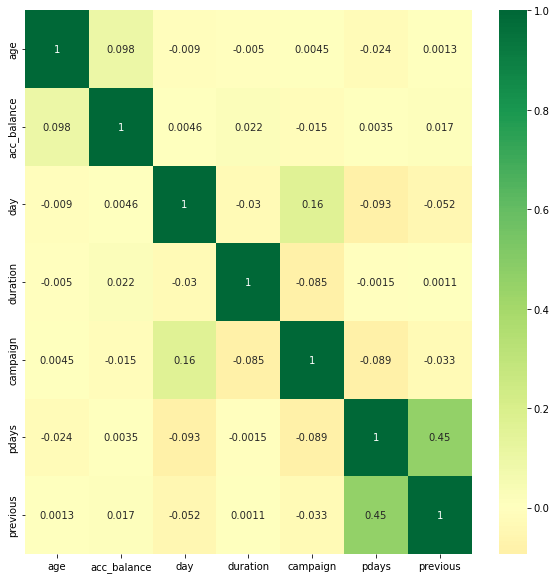

In [15]:
#finding the correlation among the variables

plt.figure(figsize = (10,10))
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn', center = 0)
plt.show()

No issues of multicollinearity as per the heat map above. 

In [16]:
# checking some statistics namely; count, mean, sd, quartiles, min and max
df1.describe()

,age,acc_balance,day,duration,campaign,pdays,previous
count,45184.000000,45184.000000,45184.000000,45184.000000,45184.000000,45184.000000,45184.000000
mean,40.939735,1362.399279,15.806325,258.315576,2.763810,40.191262,0.580493
std,10.618568,3044.558633,8.322471,257.529150,3.097138,100.077234,2.304015
min,18.000000,-8019.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### For categorical data

In [17]:
#replace "unknown" values

col_with_unknown = ['job','contact_method', 'education','poutcome']

for column in col_with_unknown:
    mode = df1[column].mode()[0]
    df1[column] = df1[column].replace('unknown', mode)

for col in col_with_unknown:
    print(col, df1[col].nunique(),"unique values")
    print(df1[col].unique())

job 11 unique values
['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
contact_method 2 unique values
['cellular' 'telephone']
education 3 unique values
['tertiary' 'secondary' 'primary']
poutcome 4 unique values
['unknown' 'failure' 'other' 'success']


In [18]:
#as output above still showed "unknown" for contact_method, find the mode seperately

print(df1['poutcome'].value_counts())

unknown    36935
failure     4901
other       1839
success     1509
Name: poutcome, dtype: int64


In [19]:
df1['poutcome'] = df1['poutcome'].replace('other', 'unknown')
print(df1['poutcome'].value_counts())

unknown    38774
failure     4901
success     1509
Name: poutcome, dtype: int64


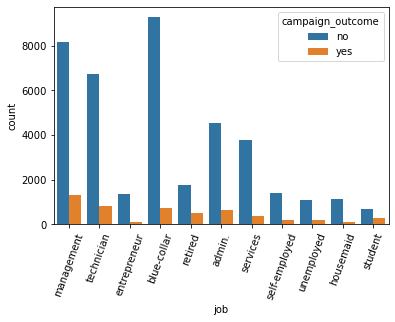

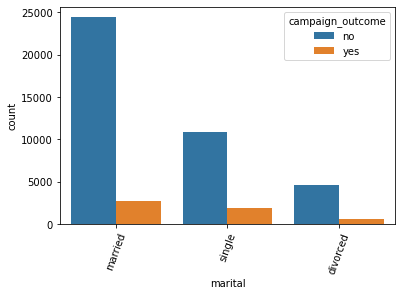

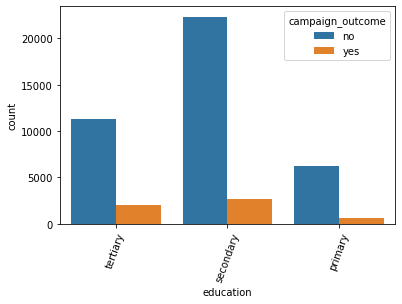

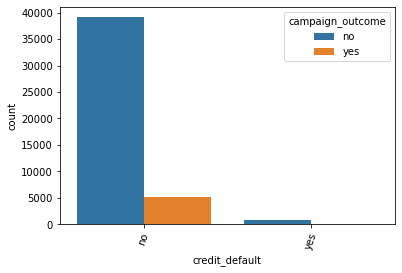

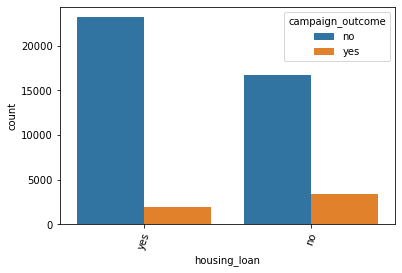

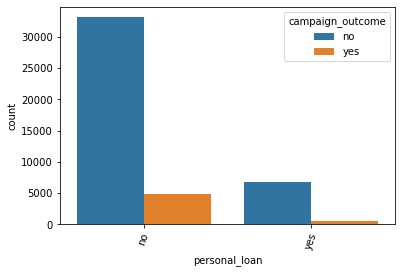

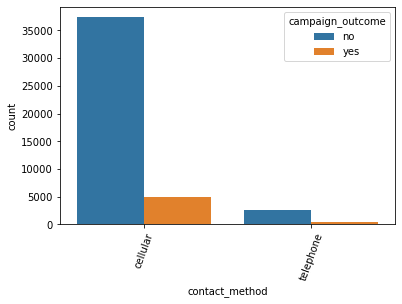

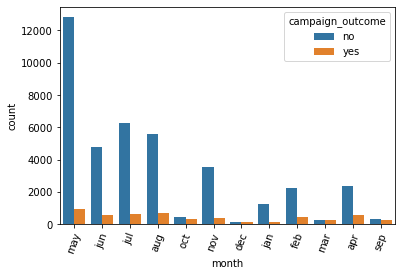

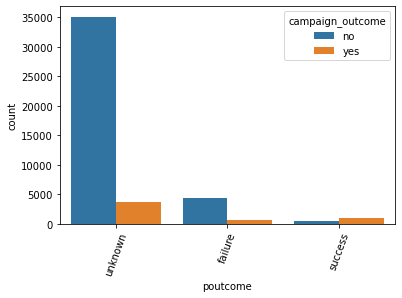

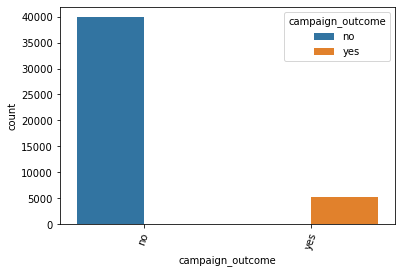

In [20]:
#Exploratory Data Analysis for categorical variable

cat_var =  df1.select_dtypes(include=['object']).columns

for c in cat_var:
    
    ax = sns.countplot(x=c, hue='campaign_outcome', data=df1)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
    
    plt.show()

customers with ‘blue-collar’ jobs were contacted the most but ‘management’ jobs bought the long-term deposit marketed the most than other jobs. From graphs plotted similarly, it was found that customers who do blue-collar jobs, are married, with secondary education, with no credit defaults, who use cell phones, are contacted the most and the mostly bought the long-term deposit that was marketed. Customers having housing loans, but no personal loans were contacted the most. However, customers who had no housing loan, nor personal loans bought the long-term deposit marketed the most. Customers were mostly contacted in the month of May, and whose previous campaign outcomes were unknown. Customers were least contacted on the months of September, December and March.

## Data Transformation

In [21]:
# using logarithmic transformation to reduce skewness of skewed variables 

col_with_outliers = ['age','duration']
    
df1['log_of_age'] = df1['age'].map(lambda i: np.log(i) if i > 0 else 0) 
print('Age', df1['age'].skew(), df1['log_of_age'].skew())

df1['log_of_duration'] = df1['duration'].map(lambda i: np.log(i) if i > 0 else 0) 
print('duration', df1['duration'].skew(), df1['log_of_duration'].skew())

Age 0.684854667719001 0.09897518818612128
duration 3.1449531671884934 -0.46758876936523613


In [22]:
#delete columns
df2 = df1.drop(['age', 'duration'], axis=1)

print(df2)

                job   marital  education credit_default  acc_balance  \
0        management   married   tertiary             no         2143   
1        technician    single  secondary             no           29   
2      entrepreneur   married  secondary             no            2   
3       blue-collar   married  secondary             no         1506   
4       blue-collar    single  secondary             no            1   
...             ...       ...        ...            ...          ...   
45206    technician   married   tertiary             no          825   
45207       retired  divorced    primary             no         1729   
45208       retired   married  secondary             no         5715   
45209   blue-collar   married  secondary             no          668   
45210  entrepreneur   married  secondary             no         2971   

      housing_loan personal_loan contact_method  day month  campaign  pdays  \
0              yes            no       cellular    5   m

In [23]:
#change order of columns by name
df3 = df2.reindex(columns = ['log_of_age', 'job', 'marital', 'education', 'credit_default','acc_balance', 'housing_loan',
       'personal_loan', 'contact_method', 'month', 'day', 'log_of_duration',
       'campaign', 'pdays', 'previous', 'poutcome','campaign_outcome'])

df3

,log_of_age,job,marital,education,credit_default,acc_balance,housing_loan,personal_loan,contact_method,month,day,log_of_duration,campaign,pdays,previous,poutcome,campaign_outcome
0,4.060443,management,married,tertiary,no,2143,yes,no,cellular,may,5,5.564520,1,-1,0,unknown,no
1,3.784190,technician,single,secondary,no,29,yes,no,cellular,may,5,5.017280,1,-1,0,unknown,no
2,3.496508,entrepreneur,married,secondary,no,2,yes,yes,cellular,may,5,4.330733,1,-1,0,unknown,no
3,3.850148,blue-collar,married,secondary,no,1506,yes,no,cellular,may,5,4.521789,1,-1,0,unknown,no
4,3.496508,blue-collar,single,secondary,no,1,no,no,cellular,may,5,5.288267,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3.931826,technician,married,tertiary,no,825,no,no,cellular,nov,17,6.884487,3,-1,0,unknown,yes
45207,4.262680,retired,divorced,primary,no,1729,no,no,cellular,nov,17,6.122493,2,-1,0,unknown,yes
45208,4.276666,retired,married,secondary,no,5715,no,no,cellular,nov,17,7.027315,5,184,3,success,yes
45209,4.043051,blue-collar,married,secondary,no,668,no,no,telephone,nov,17,6.230481,4,-1,0,unknown,no


In [24]:
df3.describe()

,log_of_age,acc_balance,day,log_of_duration,campaign,pdays,previous
count,45184.000000,45184.000000,45184.000000,45184.000000,45184.000000,45184.000000,45184.000000
mean,3.679527,1362.399279,15.806325,5.164700,2.763810,40.191262,0.580493
std,0.254549,3044.558633,8.322471,0.928404,3.097138,100.077234,2.304015
min,2.890372,-8019.000000,1.000000,1.609438,1.000000,-1.000000,0.000000
25%,3.496508,72.000000,8.000000,4.634729,1.000000,-1.000000,0.000000
50%,3.663562,449.000000,16.000000,5.192957,2.000000,-1.000000,0.000000
75%,3.871201,1428.000000,21.000000,5.765191,3.000000,-1.000000,0.000000
max,4.553877,102127.000000,31.000000,8.500657,63.000000,871.000000,275.000000


In [25]:
print(df3['previous'].value_counts())

0      36930
1       2772
2       2104
3       1142
4        713
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64


In [26]:
# Using drop() to delete row with 275 as previous value
df3.drop(df3[df3['previous']==275].index, inplace = True)

print(df3['previous'].value_counts())

0     36930
1      2772
2      2104
3      1142
4       713
5       459
6       277
7       205
8       129
9        92
10       67
11       65
12       44
13       38
15       20
14       19
17       15
16       13
19       11
20        8
23        8
18        6
22        6
24        5
27        5
21        4
29        4
25        4
30        3
38        2
37        2
26        2
28        2
51        1
58        1
32        1
40        1
55        1
35        1
41        1
Name: previous, dtype: int64


In [27]:
df3.describe()

,log_of_age,acc_balance,day,log_of_duration,campaign,pdays,previous
count,45183.000000,45183.000000,45183.000000,45183.000000,45183.000000,45183.000000,45183.00000
mean,3.679526,1362.417414,15.806631,5.164685,2.763827,40.186353,0.57442
std,0.254551,3044.589884,8.322310,0.928409,3.097171,100.072901,1.90836
min,2.890372,-8019.000000,1.000000,1.609438,1.000000,-1.000000,0.00000
25%,3.496508,72.000000,8.000000,4.634729,1.000000,-1.000000,0.00000
50%,3.663562,449.000000,16.000000,5.192957,2.000000,-1.000000,0.00000
75%,3.871201,1428.000000,21.000000,5.765191,3.000000,-1.000000,0.00000
max,4.553877,102127.000000,31.000000,8.500657,63.000000,871.000000,58.00000


In [28]:
#putting the continouse variables into intervals 

def change_age(inpt):
    
    if inpt<= 3 and inpt>= 2: 
        return 'young'
    elif inpt <=4 and inpt > 3: 
        return 'middle_age'
    else: 
        return 'old'
    
df3["log_of_age"]=df3["log_of_age"].apply(change_age)

def change_day(inpt):
    
    if inpt<= 10 and inpt>= 0: 
        return 'within_last_10d'
    elif inpt <=20 and inpt > 10: 
        return 'within_last_10_to_20d'
    else: 
        return 'within_last_20_or_more_d'
    
df3["day"]=df3["day"].apply(change_day)

def change_log_of_duration(inpt):
    
    if inpt<= 3 and inpt>= 1: 
        return 'short_duration'
    elif inpt <=6 and inpt > 3: 
        return 'medium_duration'
    else: 
        return 'long_duration'
    
df3["log_of_duration"]=df3["log_of_duration"].apply(change_log_of_duration)

def change_pdays(inpt):
    
    if inpt<= 250 and inpt>= -1: 
        return 'within_250d'
    elif inpt <= 500 and inpt > 250: 
        return 'within_250_and_500d'
    elif inpt <= 750 and inpt > 500:
        return 'within_500_and_750d'
    else:
        return 'more_than_750d' 
    
df3["pdays"]=df3["pdays"].apply(change_pdays)

def change_campaign(inpt):
    
    if inpt<= 25 and inpt>= 0: 
        return '0_to_25_contacts'
    elif inpt <= 50 and inpt > 25: 
        return '25_to_50_contacts'
    else:
        return 'more_than_50_contacts'
    
df3["campaign"]=df3["campaign"].apply(change_campaign)


def change_previous(inpt):
    
    if inpt<= 20 and inpt>= 0: 
        return '0_to_20_contacts'
    elif inpt <= 40 and inpt > 20: 
        return '20_to_40_contacts'
    else:
        return 'more_than_40_contacts'
    
df3["previous"]=df3["previous"].apply(change_previous)

def change_acc_balance(inpt):
    
    if inpt< 0 and inpt>= -10000: 
        return 'negative_acc_balance'
    elif inpt <= 50000 and inpt >= 0: 
        return '0_to_50k_acc_balance'
    else:
        return 'more_than_50k_acc_balance'
    
df3["acc_balance"]=df3["acc_balance"].apply(change_acc_balance)


df3

,log_of_age,job,marital,education,credit_default,acc_balance,housing_loan,personal_loan,contact_method,month,day,log_of_duration,campaign,pdays,previous,poutcome,campaign_outcome
0,old,management,married,tertiary,no,0_to_50k_acc_balance,yes,no,cellular,may,within_last_10d,medium_duration,0_to_25_contacts,within_250d,0_to_20_contacts,unknown,no
1,middle_age,technician,single,secondary,no,0_to_50k_acc_balance,yes,no,cellular,may,within_last_10d,medium_duration,0_to_25_contacts,within_250d,0_to_20_contacts,unknown,no
2,middle_age,entrepreneur,married,secondary,no,0_to_50k_acc_balance,yes,yes,cellular,may,within_last_10d,medium_duration,0_to_25_contacts,within_250d,0_to_20_contacts,unknown,no
3,middle_age,blue-collar,married,secondary,no,0_to_50k_acc_balance,yes,no,cellular,may,within_last_10d,medium_duration,0_to_25_contacts,within_250d,0_to_20_contacts,unknown,no
4,middle_age,blue-collar,single,secondary,no,0_to_50k_acc_balance,no,no,cellular,may,within_last_10d,medium_duration,0_to_25_contacts,within_250d,0_to_20_contacts,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,middle_age,technician,married,tertiary,no,0_to_50k_acc_balance,no,no,cellular,nov,within_last_10_to_20d,long_duration,0_to_25_contacts,within_250d,0_to_20_contacts,unknown,yes
45207,old,retired,divorced,primary,no,0_to_50k_acc_balance,no,no,cellular,nov,within_last_10_to_20d,long_duration,0_to_25_contacts,within_250d,0_to_20_contacts,unknown,yes
45208,old,retired,married,secondary,no,0_to_50k_acc_balance,no,no,cellular,nov,within_last_10_to_20d,long_duration,0_to_25_contacts,within_250d,0_to_20_contacts,success,yes
45209,old,blue-collar,married,secondary,no,0_to_50k_acc_balance,no,no,telephone,nov,within_last_10_to_20d,long_duration,0_to_25_contacts,within_250d,0_to_20_contacts,unknown,no


Some columns were put into intervals and one hot encoding was done, for the ease in machine learning model implementation.

In [29]:
# checking the datatypes of all columns
print(df3.dtypes)

log_of_age          object
job                 object
marital             object
education           object
credit_default      object
acc_balance         object
housing_loan        object
personal_loan       object
contact_method      object
month               object
day                 object
log_of_duration     object
campaign            object
pdays               object
previous            object
poutcome            object
campaign_outcome    object
dtype: object


In [30]:
#Make copy to avoid changing original data 
encoded_data = df3.copy()

from sklearn.preprocessing import OneHotEncoder


#Using one-hot encoding to convert the categorical variables into numerical

encoded_data = pd.get_dummies(data = encoded_data)
encoded_data

,log_of_age_middle_age,log_of_age_old,log_of_age_young,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,pdays_within_250d,pdays_within_500_and_750d,previous_0_to_20_contacts,previous_20_to_40_contacts,previous_more_than_40_contacts,poutcome_failure,poutcome_success,poutcome_unknown,campaign_outcome_no,campaign_outcome_yes
0,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
2,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
3,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
45207,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,1
45208,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
45209,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0


In [31]:
encoded_data.columns

Index(['log_of_age_middle_age', 'log_of_age_old', 'log_of_age_young',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'credit_default_no',
       'credit_default_yes', 'acc_balance_0_to_50k_acc_balance',
       'acc_balance_more_than_50k_acc_balance',
       'acc_balance_negative_acc_balance', 'housing_loan_no',
       'housing_loan_yes', 'personal_loan_no', 'personal_loan_yes',
       'contact_method_cellular', 'contact_method_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_within_last_10_to_20d', 'day_within_last_10d',
       'day_within_last_20

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Xx = encoded_data.iloc[:,0:-1]  
yy = encoded_data.iloc[:,-1]     

#apply SelectKBest class to extract top 30 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xx,yy)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xx.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 25 best features

                               Specs        Score
62               campaign_outcome_no  5289.000000
46     log_of_duration_long_duration  4350.200109
60                  poutcome_success  4117.519234
47   log_of_duration_medium_duration   797.934914
38                         month_mar   749.019554
41                         month_oct   740.905023
42                         month_sep   682.526956
25                   housing_loan_no   486.723873
26                  housing_loan_yes   388.948850
39                         month_may   330.264964
8                        job_retired   269.202226
11                       job_student   262.092934
33                         month_dec   253.977613
31                         month_apr   180.606079
4                    job_blue-collar   178.903556
61                  poutcome_unknown   178.457139
28                 personal_loan_yes   176.306121
1                     log_of_age_old   167.260352
48    log_of_duration_short_duration   160.160654


In [33]:
encoded_data.drop(['credit_default_yes','credit_default_no','housing_loan_no', 'personal_loan_no', 'contact_method_telephone','contact_method_cellular','day_within_last_10d', 'day_within_last_10_to_20d','day_within_last_20_or_more_d', 'campaign_25_to_50_contacts', 'campaign_0_to_25_contacts','campaign_more_than_50_contacts','previous_20_to_40_contacts',
       'previous_more_than_40_contacts','previous_0_to_20_contacts','campaign_outcome_no'], axis=1, inplace=True) 

In [34]:
encoded_data.shape

(45183, 48)

In [35]:
encoded_data.columns

Index(['log_of_age_middle_age', 'log_of_age_old', 'log_of_age_young',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary',
       'acc_balance_0_to_50k_acc_balance',
       'acc_balance_more_than_50k_acc_balance',
       'acc_balance_negative_acc_balance', 'housing_loan_yes',
       'personal_loan_yes', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'log_of_duration_long_duration',
       'log_of_duration_medium_duration', 'log_of_duration_short_duration',
       'pdays_more_than_750d', 'pdays_within_250_and_500d',
       'pdays_within_250d', 'pdays_within_500_and_750d', 'po

In [36]:
# checking if the dataset is imbalanced using the percentage of responses for the dependent variable

print(encoded_data['campaign_outcome_yes'].value_counts())

(encoded_data['campaign_outcome_yes'].value_counts()/encoded_data['campaign_outcome_yes'].value_counts().sum())*100

0    39894
1     5289
Name: campaign_outcome_yes, dtype: int64


0    88.29427
1    11.70573
Name: campaign_outcome_yes, dtype: float64

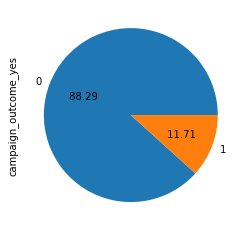

In [37]:
encoded_data['campaign_outcome_yes'].value_counts().plot.pie(autopct = "% .2f");

The dataset was imbalanced so undersampling method was used where 4228 records of customers who subscribed for the term deposit were kept, and 4228 random sample of records were selected from 31918 of customers who did not subscribe for the term deposit.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler 

array = encoded_data.values

# Features: columns without the dependent variable
X = array[:,0:-1]

# Target variable: seperating the dependent variable 
y = array[:,-1]

# 20% of the data will be used for testing

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 88)

# summarizing class distribution
print("Before undersampling: ", Counter(y_train))


# definning undersampling strategy
random_under_sample = RandomUnderSampler(sampling_strategy= 1 ,random_state = 52)

# fitting and applying the transform
X_train_under, y_train_under = random_under_sample.fit_resample(X_train, y_train)

# summarizing class distribution
print("After undersampling: ", Counter(y_train_under))

Before undersampling:  Counter({0: 31918, 1: 4228})
After undersampling:  Counter({0: 4228, 1: 4228})


In [39]:
encoded_data.columns

Index(['log_of_age_middle_age', 'log_of_age_old', 'log_of_age_young',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary',
       'acc_balance_0_to_50k_acc_balance',
       'acc_balance_more_than_50k_acc_balance',
       'acc_balance_negative_acc_balance', 'housing_loan_yes',
       'personal_loan_yes', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'log_of_duration_long_duration',
       'log_of_duration_medium_duration', 'log_of_duration_short_duration',
       'pdays_more_than_750d', 'pdays_within_250_and_500d',
       'pdays_within_250d', 'pdays_within_500_and_750d', 'po

## Applying machine learning algorithms

### Logistic regression

accuracy is: 0.8260484674117516


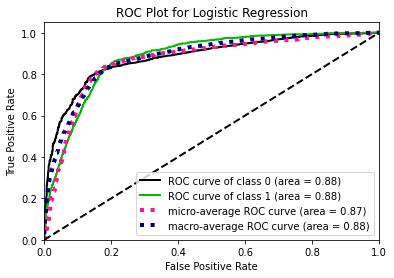

In [40]:
from sklearn.linear_model import LogisticRegression

# fitting LR model

LR = LogisticRegression()
LR.fit(X_train_under, y_train_under)
y_LR_proba = LR.predict_proba(X_test)

#predicting values
LR_predictions = LR.predict(X_test)

# Accuracy Score 
print('accuracy is:', accuracy_score(y_test, LR_predictions))

#plotting ROC curve
skplt.metrics.plot_roc(y_test, y_LR_proba, title = 'ROC Plot for Logistic Regression');

Accuracy score is the percentage of correct predictions out of all predictions made. The LR algorithm achieves an accuracy of 82.60%, suggesting high level of strength of this model to classify the customer response given all the defined customer features.

The faster the ROC approaches 1, the better the model performance

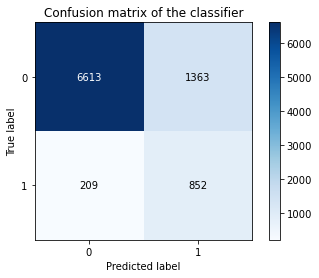

In [41]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix

skplt.metrics.plot_confusion_matrix(y_test, LR_predictions, title = 'Confusion matrix of the classifier');

In [42]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, LR_predictions))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      7976
           1       0.38      0.80      0.52      1061

    accuracy                           0.83      9037
   macro avg       0.68      0.82      0.71      9037
weighted avg       0.90      0.83      0.85      9037



Classification report shows the precision, recall, F1 and support scores for the classification model.

Precision of 0 (the customer did not subscribe) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 97%.

Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 83% correctly that they would decline the offer.

In general, the report shows that the model has great predictive power to identify the customers who would not subscribe to the term deposit with a 0.71 macro average F1-Score. 

### Bernoulli Naive Bayes 

0.8101139758769503


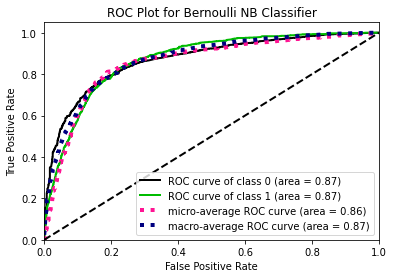

In [43]:
from sklearn.naive_bayes import BernoulliNB

B_NV = BernoulliNB() 
B_NV.fit(X_train_under,y_train_under)
y_B_NV_proba = B_NV.predict_proba(X_test)

#predicting values
B_NV_predictions = B_NV.predict(X_test)

# Accuracy Score 
print(accuracy_score(y_test, B_NV_predictions))

#plotting ROC curve
skplt.metrics.plot_roc(y_test, y_B_NV_proba, title = 'ROC Plot for Bernoulli NB Classifier');

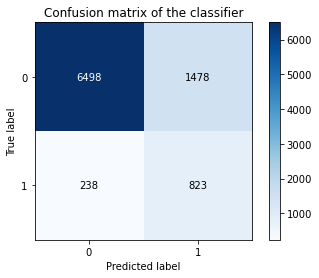

In [44]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix

skplt.metrics.plot_confusion_matrix(y_test, B_NV_predictions, title = 'Confusion matrix of the classifier');

In [45]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, B_NV_predictions))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      7976
           1       0.36      0.78      0.49      1061

    accuracy                           0.81      9037
   macro avg       0.66      0.80      0.69      9037
weighted avg       0.89      0.81      0.84      9037



### Multinomial Naive Bayes Algorithm

0.8064623215668917


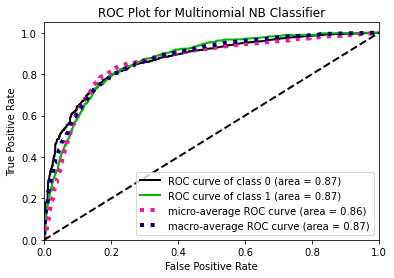

In [46]:
from sklearn.naive_bayes import MultinomialNB

M_NV = MultinomialNB() 
M_NV.fit(X_train_under,y_train_under) 
y_M_NV_proba = M_NV.predict_proba(X_test)

#predicting values
M_NV_predictions = M_NV.predict(X_test)

# Accuracy Score 
print(accuracy_score(y_test, M_NV_predictions))

#plotting ROC curve
skplt.metrics.plot_roc(y_test, y_M_NV_proba, title = 'ROC Plot for Multinomial NB Classifier');

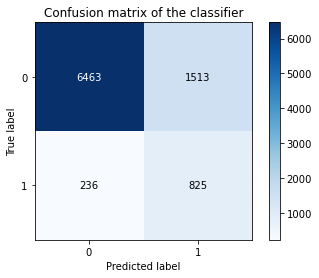

In [47]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix

skplt.metrics.plot_confusion_matrix(y_test, M_NV_predictions, title = 'Confusion matrix of the classifier');

In [48]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, M_NV_predictions))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      7976
           1       0.35      0.78      0.49      1061

    accuracy                           0.81      9037
   macro avg       0.66      0.79      0.68      9037
weighted avg       0.89      0.81      0.83      9037



### XGBoost

0.8044705101250414


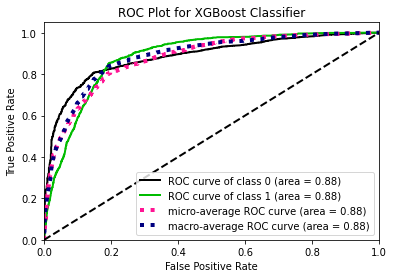

In [49]:
import xgboost as xgb
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train_under, y_train_under)
y_XGB_proba = XGB.predict_proba(X_test)

#predicting values
XGB_predictions = XGB.predict(X_test)

# Accuracy Score 
print(accuracy_score(y_test, XGB_predictions))

#plotting ROC curve
skplt.metrics.plot_roc(y_test, y_XGB_proba, title = 'ROC Plot for XGBoost Classifier');

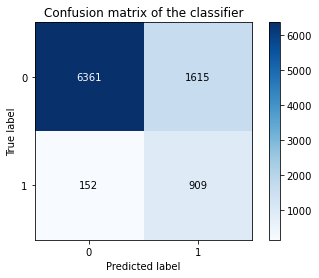

In [50]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix

skplt.metrics.plot_confusion_matrix(y_test, XGB_predictions, title = 'Confusion matrix of the classifier');

In [51]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, XGB_predictions))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      7976
           1       0.36      0.86      0.51      1061

    accuracy                           0.80      9037
   macro avg       0.67      0.83      0.69      9037
weighted avg       0.90      0.80      0.83      9037



### Random Forest

Accuracy score is: 0.782117959499834


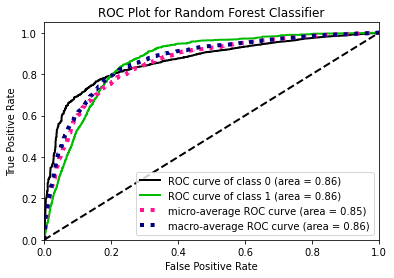

In [52]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

# fitting LR model
RF = RandomForestClassifier()
RF.fit(X_train_under, y_train_under)
y_RF_proba = RF.predict_proba(X_test)

#predicting values
RF_predictions = RF.predict(X_test)

# Accuracy Score 
print('Accuracy score is:',accuracy_score(y_test, RF_predictions))

#plotting ROC curve
skplt.metrics.plot_roc(y_test, y_RF_proba, title = 'ROC Plot for Random Forest Classifier');

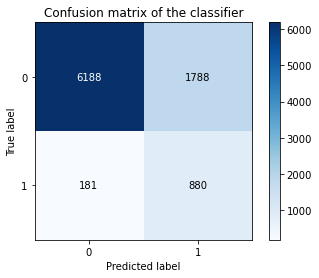

In [53]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix

skplt.metrics.plot_confusion_matrix(y_test, RF_predictions, title = 'Confusion matrix of the classifier');

In [54]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, RF_predictions))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      7976
           1       0.33      0.83      0.47      1061

    accuracy                           0.78      9037
   macro avg       0.65      0.80      0.67      9037
weighted avg       0.90      0.78      0.82      9037



# Comparing the models

## All models cross validation score

In [55]:
#importing necessary packages
from sklearn.model_selection import cross_val_score

LR = LogisticRegression()
B_NV = BernoulliNB()
M_NV = MultinomialNB() 
XGB = XGBClassifier()
RF = RandomForestClassifier()

y = encoded_data['campaign_outcome_yes']
                 
models=[LR,B_NV,M_NV, XGB,RF]
scores=[]

for model in models:
    
    score=cross_val_score(model,X,y,cv=5).mean()
    scores.append(score)
    
print(scores)

[0.7870621236789407, 0.7532013487613242, 0.7579594057836009, 0.706452874888505, 0.6984641689717591]


Cross validation technique was used to assess how well each of the predictive models will perform in real-world situations or on unseen data. It also reduces overfitting and underfitting problems as it reduces bias and variance. According to the cross-validation scores calculated, Logistic Regression recorded the highest value of 0.7871 followed by Multinomial Naïve Bayes with 0.758.


## ROC AUC for each model

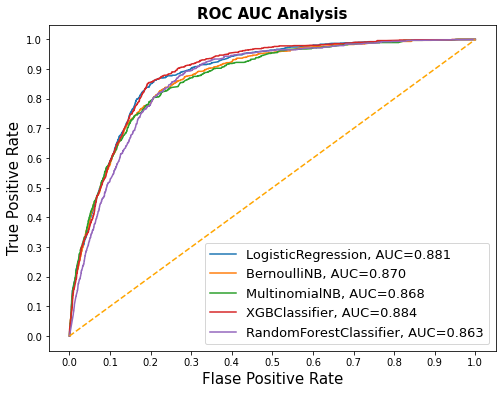

In [65]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               BernoulliNB(),
               MultinomialNB(),
               XGBClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_under, y_train_under)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    # Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

According to the ROC AUC of all models, XGBoost has the largest area under the curve,0.884 which is slighty higher when compared with Logistic Regression with an area under the curve equal to 0.881. The diagonal line represents AUC=0.5, meaning AUC for random guessing. The further away the ROC curve is from this line, the better the model performance.

# Feature importance 

[0.01054105 0.00978904 0.00065752 0.01611241 0.01627374 0.0081284
 0.00609698 0.0154641  0.01204586 0.00811741 0.00960726 0.00947033
 0.0183901  0.00865927 0.01148257 0.01733163 0.01614964 0.01273414
 0.01691568 0.01673262 0.00859744 0.00019811 0.00754164 0.06085345
 0.0266893  0.0244548  0.02031322 0.00682199 0.01450177 0.00855761
 0.01751895 0.01461716 0.02468836 0.0284551  0.0131007  0.02436574
 0.01450001 0.14941049 0.12746864 0.01841552 0.0008639  0.01037556
 0.01065878 0.00144234 0.01522575 0.06837543 0.04128851]


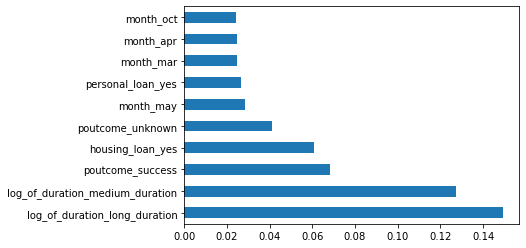

In [61]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train_under,y_train_under)
print(model.feature_importances_) 
 
#plot the graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=encoded_data.columns[:-1])
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The top 10 features that impact the outcome of the telemarketing campaign. Call duration seems to have the highest impact, followed by successful previous campaign outcomes, having housing loans, unknown previous campaign outcomes, campaigns conducted in the month of May, having personal loans, and campaigns conducted in month of April, March and October respectively.